## 🛡️ Support Vector Machines (SVM)

In this final modeling phase, we implement **Support Vector Machines (SVM)**. This algorithm is particularly powerful for medical binary classification because it seeks to find the **Maximum Margin Hyperplane**—the boundary that maximizes the distance between 'High Risk' and 'Low Risk' cases.

We will evaluate different kernel functions:
1. **Linear**: Best for linearly separable data.
2. **Polynomial (Poly)**: Captures complex interactions between clinical features.
3. **RBF (Radial Basis Function)**: The most popular choice for non-linear medical datasets.
4. **Sigmoid**: Mimics the behavior of neural networks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# SVM Specific libraries
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("✅ SVM Environment initialized. Ready for kernel optimization.")

✅ SVM Environment initialized. Ready for kernel optimization.


## 🔍 Data Distribution & Class Separability

Before applying **SVM**, we visualize how our classes (Risk vs. No Risk) are distributed. SVM tries to find the best boundary (Hyperplane) between these groups. 

* **Red Points**: Low Risk (Output 0)
* **Blue Points**: High Risk (Output 1)

By plotting clinical features like `Age` vs. `Cholesterol`, we can see if the classes are linearly separable or require a non-linear kernel.

In [3]:
df = pd.read_csv("../data/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


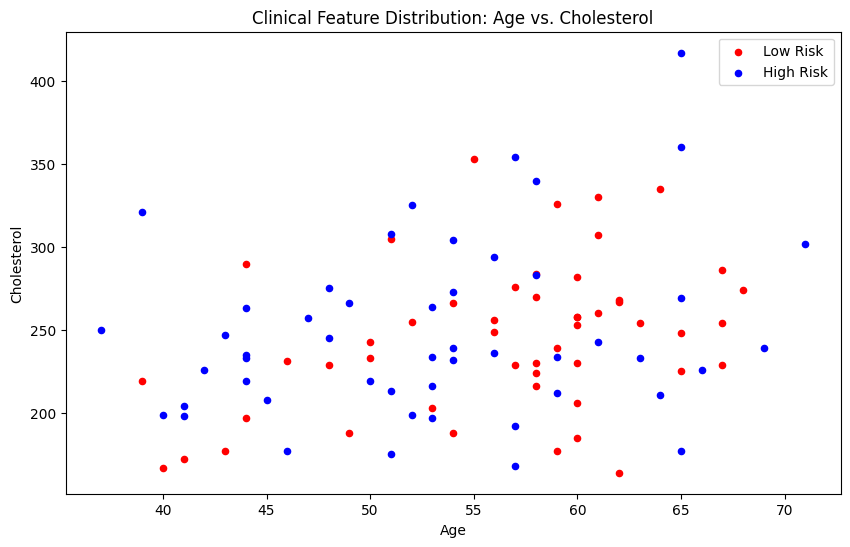

In [4]:
# Separate the classes
low_risk = df[df['output'] == 0]
high_risk = df[df['output'] == 1]

# Plotting Age vs Cholesterol to see the distribution
ax = low_risk[0:50].plot(kind='scatter', x='age', y='chol', color='red', label='Low Risk', figsize=(10,6))
high_risk[0:50].plot(kind='scatter', x='age', y='chol', color='blue', label='High Risk', ax=ax)

plt.title('Clinical Feature Distribution: Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

## 🛠️ Data Preparation for SVM

To ensure the SVM algorithm can compute the optimal hyperplane without errors, we perform:
1. **Type Casting**: Converting `oldpeak` to integer format to maintain consistent numerical precision across features.
2. **Array Conversion**: Transforming our clinical features into NumPy arrays ($X$ and $y$) to facilitate high-speed matrix calculations required by the SVM kernels.
3. **Feature Verification**: Ensuring all 13 predictors are correctly mapped.

In [6]:
# Convert oldpeak to integer
df['oldpeak'] = df['oldpeak'].astype(int)

# Define feature set X
X = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 
                   'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])

# Define target set y
y = np.asarray(df['output'])

# Displaying shapes to ensure data integrity
print(f"Features Array X Shape: {X.shape}")
print(f"Target Array y Shape:   {y.shape}")
print("-" * 30)
print("Preview of first 2 rows of X:\n", X[0:2])

Features Array X Shape: (303, 13)
Target Array y Shape:   (303,)
------------------------------
Preview of first 2 rows of X:
 [[ 63   1   3 145 233   1   0 150   0   2   0   0   1]
 [ 37   1   2 130 250   0   1 187   0   3   0   0   2]]


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardization is mandatory for SVM performance
X = StandardScaler().fit_transform(X)

print("Data standardized. All features now have a mean of 0 and a variance of 1.")

Data standardized. All features now have a mean of 0 and a variance of 1.


## 🧪 Train/Test Split (Consistency Check)

To maintain a fair comparison between all our models, we use the same splitting strategy:
* **Test Size**: 20%
* **Random State**: 42 (Ensures the exact same samples are used for testing across all algorithms)

By keeping the test set consistent, we can definitively say which algorithm performs best on this specific clinical population.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size:  {X_test.shape[0]}")

Training set size: 242
Testing set size:  61


In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Initialize and train SVM with RBF kernel
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.ravel()) # .ravel() ensures y is a 1D array

# Predictions
y_hat_svm = clf.predict(X_test)

# Final Accuracy
svm_acc = accuracy_score(y_test, y_hat_svm)
print(f"🎯 SVM Accuracy: {svm_acc * 100:.2f}%")

🎯 SVM Accuracy: 86.89%
